<a href="https://colab.research.google.com/github/sabaakram539/telecom_churn_case_study/blob/main/Telecom_churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Case Study**

## **Business Problem**

Churn is one of the largest problems faced by most businesses.It costs too much to find a new customer than to retain an existing one. Therefore,anticipating when a customer churn should be an important goal of any business. In our study we are going to apply Logistic Regression tecgnique on a telecom dataset and based on that we are going to build a model which will predict if a customer will churn.


> **Objective :** 
 Building a model to predict whether a customer will churn or not.



In [1]:
import pandas as pd

## **Data Collection**
We have a telecom dataset in which we have churn as the target variable. Dataset is in three parts. First part is of the churn which has attributes like tenure, contract etc. The other part is of the customer details which consists of the attributes like gender, seniorcitizen etc. and the third part is of the internet which with the various attributes related to the internet service like onlinesecurity, onlinebackup etc.

Let's move ahead.

In [2]:
churn=pd.read_csv("churn")
churn.head()

,Unnamed: 0,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
customer=pd.read_csv("customer")
customer.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents
0,0,7590-VHVEG,Female,0,Yes,No
1,1,5575-GNVDE,Male,0,No,No
2,2,3668-QPYBK,Male,0,No,No
3,3,7795-CFOCW,Male,0,No,No
4,4,9237-HQITU,Female,0,No,No


In [5]:
customer.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
internet=pd.read_csv("internet")
internet.head()

,Unnamed: 0,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
internet.drop(["Unnamed: 0"],axis=1,inplace=True)

## **Data Preprocessing**
in this phase we are going to merge these three datasets, handle the missing values, convert the object variables to numeric using dummy variables etc.

**Merging the dataframes**

In [8]:
telecom=pd.merge(churn,customer, on="customerID")

In [9]:
telecom=pd.merge(telecom,internet,on="customerID")

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
print("Rows : ",telecom.shape[0])
print("Columns : ",telecom.shape[1])
print("\nFeatures :\n",telecom.columns)
print("\nMissing Values :",telecom.isnull().sum().values.sum())
print("\nUnique Values\n",telecom.nunique())
print("\n",telecom.Churn.value_counts())

Rows :  7043
Columns :  21

Features :
 Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Missing Values : 0

Unique Values
 customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

 No 

**Overview of the Churn**

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

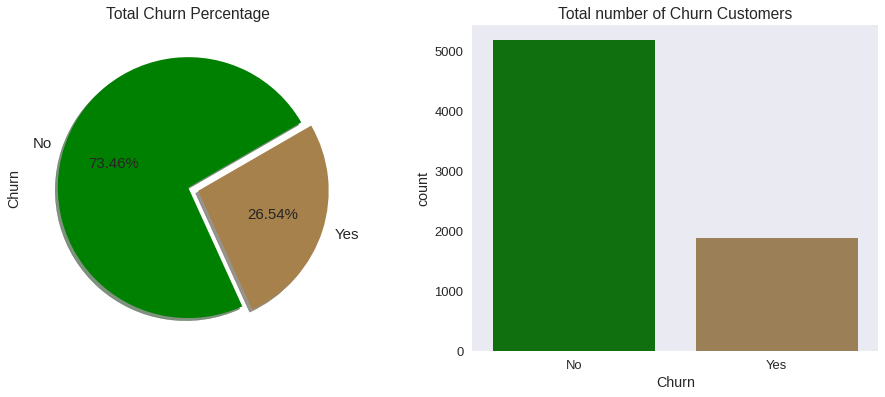

In [14]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig,ax=plt.subplots(1,2,figsize=(16,6))
telecom.Churn.value_counts().plot.pie(explode=[0,0.08],ax=ax[0],autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30,colors=["#008000","#a6814c"])
ax[0].set_title("Total Churn Percentage")

sns.countplot('Churn',data=telecom,ax=ax[1],palette=["#008000","#a6814c"])
ax[1].set_title("Total number of Churn Customers")
plt.show

The customer churn rate is 26.54%.

In [15]:
data_for_eda=telecom

**Dealing with the predictors**

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
for columns in telecom.columns:
  print()
  print(columns," --> ", telecom[columns].nunique()==2,"  No. of unique values --> ",telecom[columns].nunique())


customerID  -->  False   No. of unique values -->  7043

tenure  -->  False   No. of unique values -->  73

PhoneService  -->  True   No. of unique values -->  2

Contract  -->  False   No. of unique values -->  3

PaperlessBilling  -->  True   No. of unique values -->  2

PaymentMethod  -->  False   No. of unique values -->  4

MonthlyCharges  -->  False   No. of unique values -->  1585

TotalCharges  -->  False   No. of unique values -->  6531

Churn  -->  True   No. of unique values -->  2

gender  -->  True   No. of unique values -->  2

SeniorCitizen  -->  True   No. of unique values -->  2

Partner  -->  True   No. of unique values -->  2

Dependents  -->  True   No. of unique values -->  2

MultipleLines  -->  False   No. of unique values -->  3

InternetService  -->  False   No. of unique values -->  3

OnlineSecurity  -->  False   No. of unique values -->  3

OnlineBackup  -->  False   No. of unique values -->  3

DeviceProtection  -->  False   No. of unique values -->  3

Te

The bivariate columns are phoneService, paperlessBilling, gender, Seniorcitizen, partner, Dependents and churn. Let's have a look at their unique values and map them to 0 and 1.

In [17]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [18]:
binary_variables=['PhoneService','PaperlessBilling','Churn','gender','SeniorCitizen','Partner','Dependents']

In [19]:
for i in binary_variables:
  print()
  print(i,' --> ',telecom[i].unique())


PhoneService  -->  ['No' 'Yes']

PaperlessBilling  -->  ['Yes' 'No']

Churn  -->  ['No' 'Yes']

gender  -->  ['Female' 'Male']

SeniorCitizen  -->  [0 1]

Partner  -->  ['Yes' 'No']

Dependents  -->  ['No' 'Yes']


In [20]:
yes_no=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

In [21]:
def binary_mapping(x):
  return x.map({'Yes':1,'No':0})

In [22]:
telecom[yes_no]=telecom[yes_no].apply(binary_mapping)

In [23]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [24]:
telecom.gender=telecom.gender.map({"Male":1,"Female":0})

In [25]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,No,Fiber optic,No,No,No,No,No,No


The multivarite predictors are Contract, PaymentMethod, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. with all havig three varibles except PaymentMethod which has four variables. Let's apply dummy variables over these predictors.

In [26]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [27]:
multivariate_variables=['Contract', 'PaymentMethod','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies']

In [28]:
for i in multivariate_variables:
  dummies=pd.get_dummies(telecom[i],prefix=i)
  telecom=pd.concat([telecom,dummies],axis=1)

In [29]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,No,Fiber optic,No,No,No,No,No,No,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [30]:
telecom.shape

(7043, 52)

**Dropping the original multivariate columns**

In [31]:
telecom.drop(multivariate_variables,axis=1,inplace=True)

Also one of the multivariate dummies along with the customerID need to be removed.

In [32]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service

In [33]:
telecom.drop(['customerID','Contract_Month-to-month','PaymentMethod_Credit card (automatic)','MultipleLines_No phone service',
 'InternetService_Fiber optic', 'OnlineSecurity_No internet service','OnlineBackup_No internet service',
 'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
 'StreamingMovies_No internet service'],axis=1,inplace=True)

In [34]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.5,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [35]:
telecom.shape

(7043, 31)

In [36]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   PhoneService                             7043 non-null   int64  
 2   PaperlessBilling                         7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   object 
 5   Churn                                    7043 non-null   int64  
 6   gender                                   7043 non-null   int64  
 7   SeniorCitizen                            7043 non-null   int64  
 8   Partner                                  7043 non-null   int64  
 9   Dependents                               7043 non-null   int64  
 10  Contract_One year                        7043 no

Here everything seems fine except one thing i.e. TotalCharges is in object format. We have to deal with this also. Let's try to convert it into the numeric form.

In [37]:
telecom.TotalCharges.dtypes

dtype('O')

In [38]:
telecom.TotalCharges=pd.to_numeric(telecom.TotalCharges,errors='coerce')

In [39]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   PhoneService                             7043 non-null   int64  
 2   PaperlessBilling                         7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7043 non-null   int64  
 6   gender                                   7043 non-null   int64  
 7   SeniorCitizen                            7043 non-null   int64  
 8   Partner                                  7043 non-null   int64  
 9   Dependents                               7043 non-null   int64  
 10  Contract_One year                        7043 no

Now the TotalCharges column contains some missing values. Let's calculate the precentage of the missing values.

In [40]:
(telecom.isnull().sum()/len(telecom))*100

tenure                                     0.000000
PhoneService                               0.000000
PaperlessBilling                           0.000000
MonthlyCharges                             0.000000
TotalCharges                               0.156183
Churn                                      0.000000
gender                                     0.000000
SeniorCitizen                              0.000000
Partner                                    0.000000
Dependents                                 0.000000
Contract_One year                          0.000000
Contract_Two year                          0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Electronic check             0.000000
PaymentMethod_Mailed check                 0.000000
MultipleLines_No                           0.000000
MultipleLines_Yes                          0.000000
InternetService_DSL                        0.000000
InternetService_No                         0.000000
OnlineSecuri

The percentage of missing values is 0.15% which is very very less. It will be fair enough to remove the missing values.

In [41]:
telecom=telecom.dropna()

In [42]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   PhoneService                             7032 non-null   int64  
 2   PaperlessBilling                         7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int64  
 6   gender                                   7032 non-null   int64  
 7   SeniorCitizen                            7032 non-null   int64  
 8   Partner                                  7032 non-null   int64  
 9   Dependents                               7032 non-null   int64  
 10  Contract_One year                        7032 no

In [43]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


**Checking Outliers**

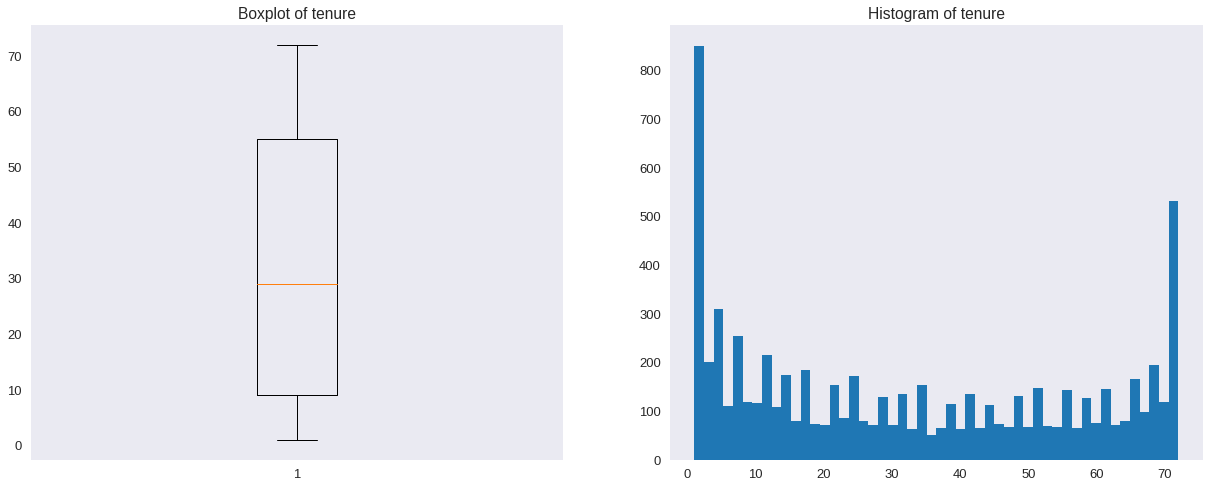

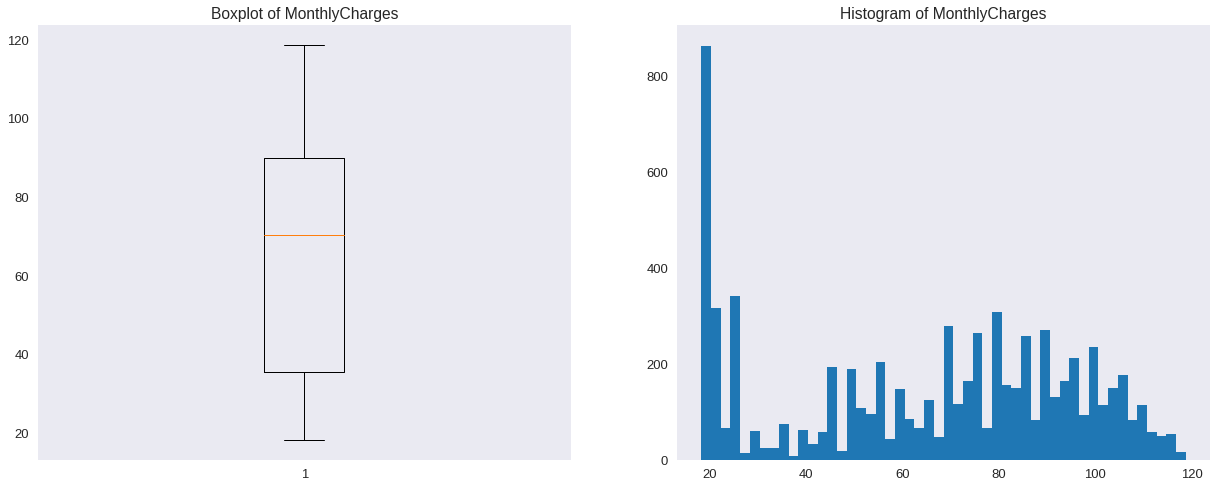

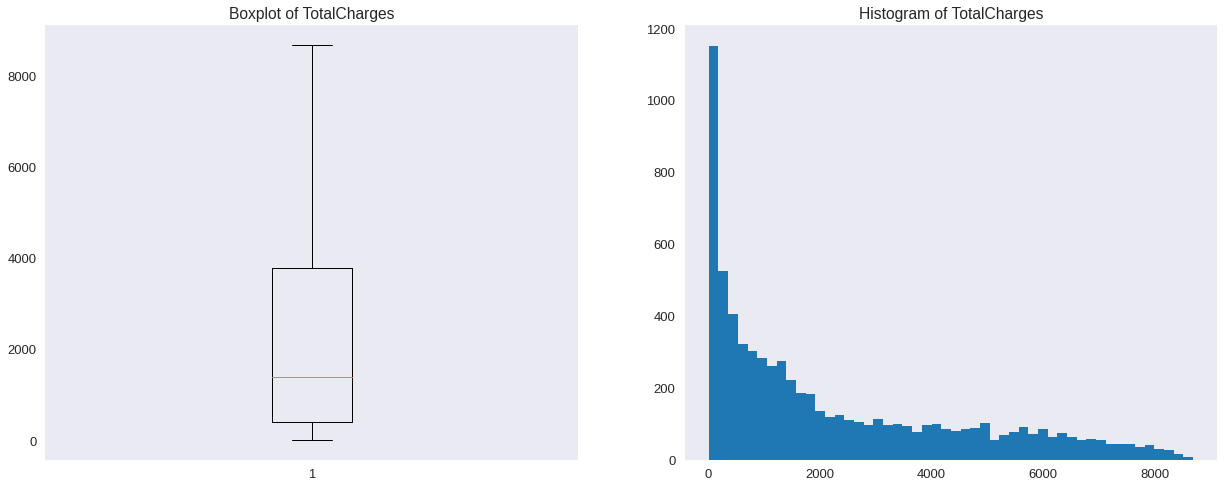

In [44]:
for i in ["tenure","MonthlyCharges","TotalCharges"]:
  fig,ax=plt.subplots(1,2,figsize=(21,8))
  ax[0].boxplot(telecom[i])
  ax[0].set_title("Boxplot of "+str(i))
  ax[1].hist(telecom[i],bins=50)
  ax[1].set_title("Histogram of "+ str(i))
  plt.show

In [45]:
telecom[['tenure','MonthlyCharges','TotalCharges']].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


From the above boxplots, histograms and the description table, we observe that these numerical variables don't have outliers.

## **Exploratory Data Analysis**

In [46]:
data_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [47]:
ID_column=['customerID']
target_column=['Churn']
categorical_column=data_for_eda.nunique()[data_for_eda.nunique()<6].keys().tolist()
categorical_column=[x for x in categorical_column if x not in target_column]
numeric_column=[x for x in data_for_eda.columns if x not in categorical_column+target_column+ID_column]


**Separating Churn and Not_churn customers**

In [48]:
churn=data_for_eda[data_for_eda['Churn']==1]
not_churn=data_for_eda[data_for_eda['Churn']==0]

**Dealing with the categorical variables**

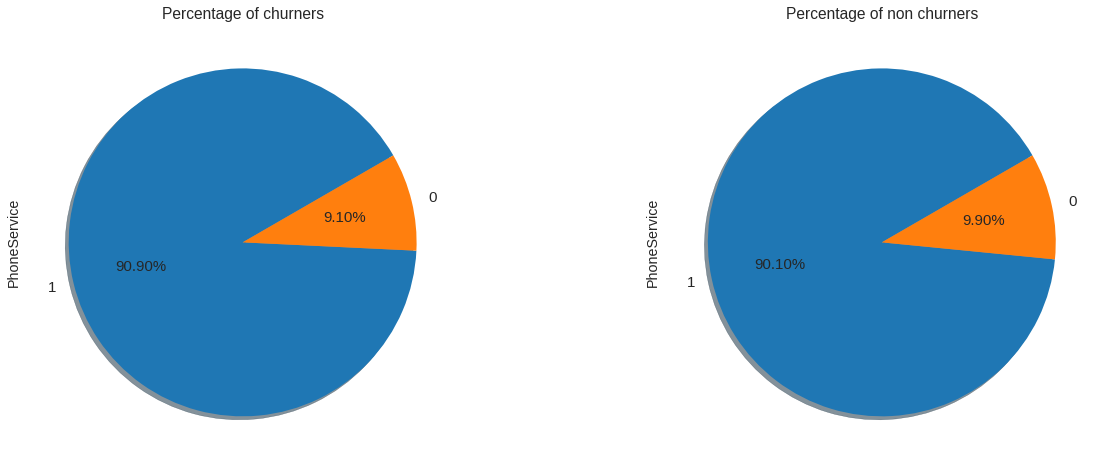

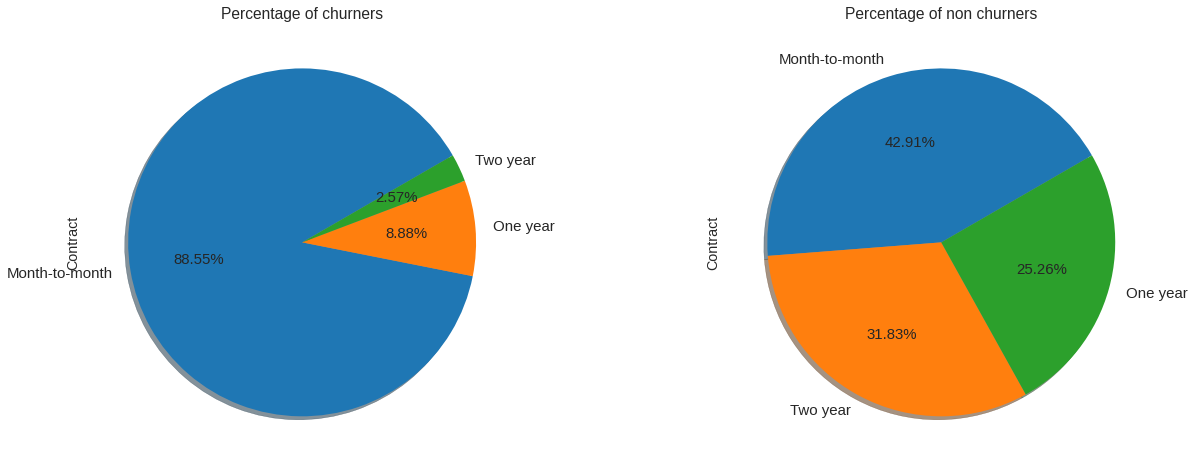

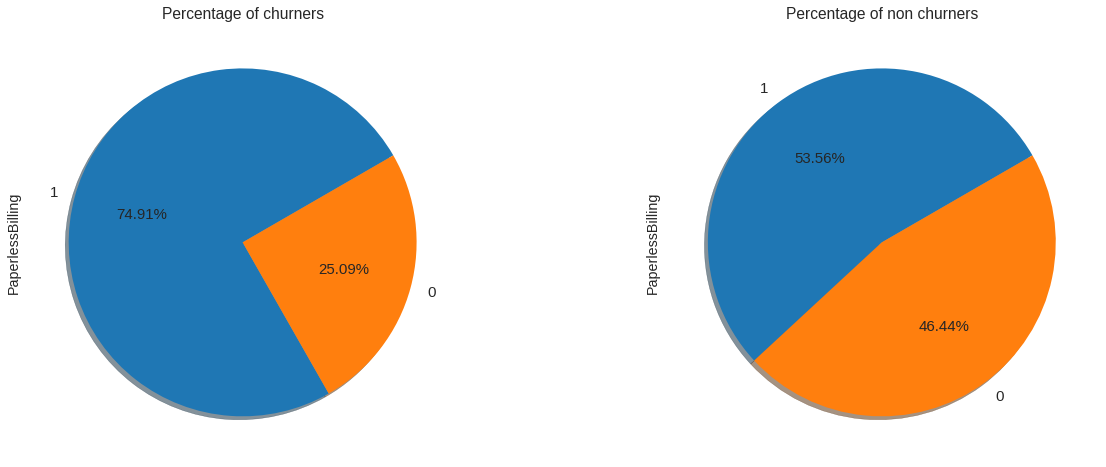

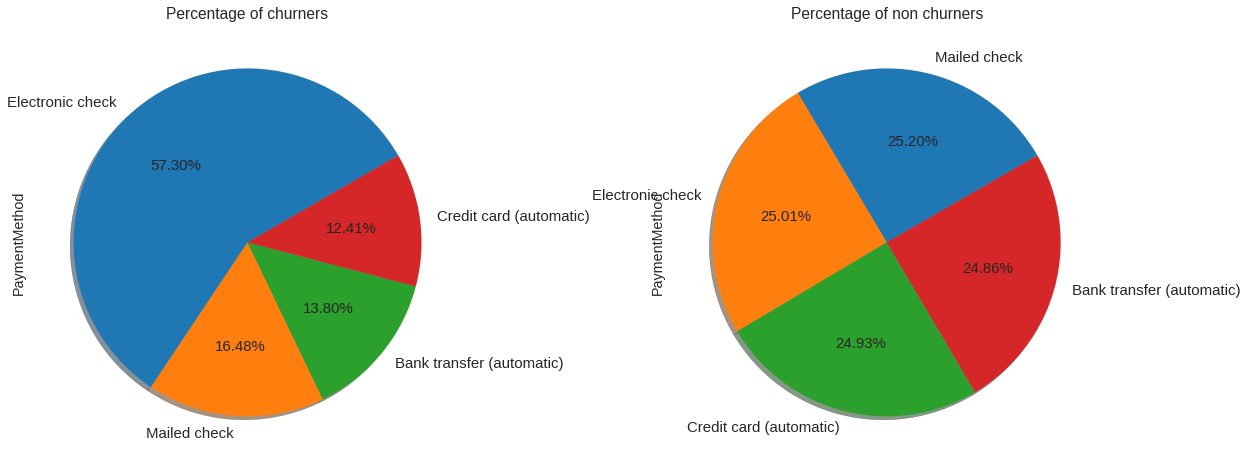

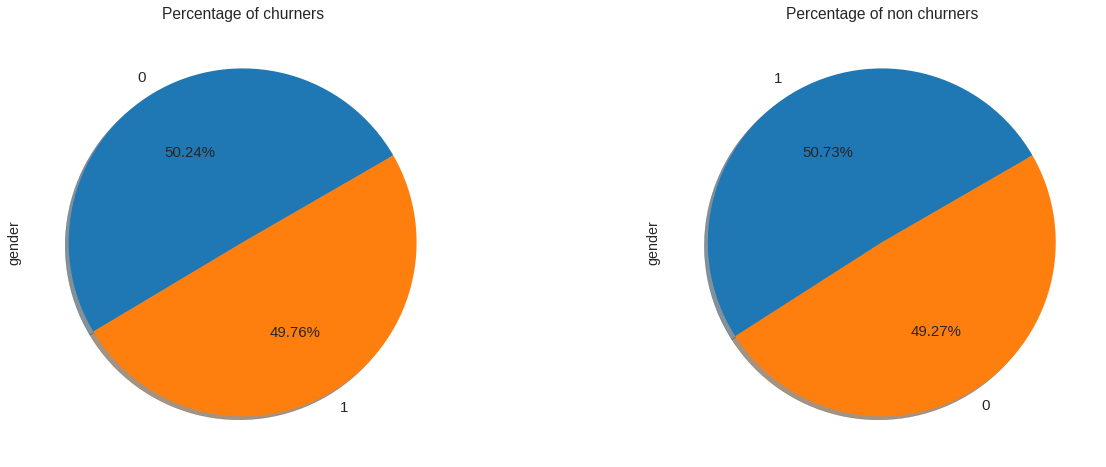

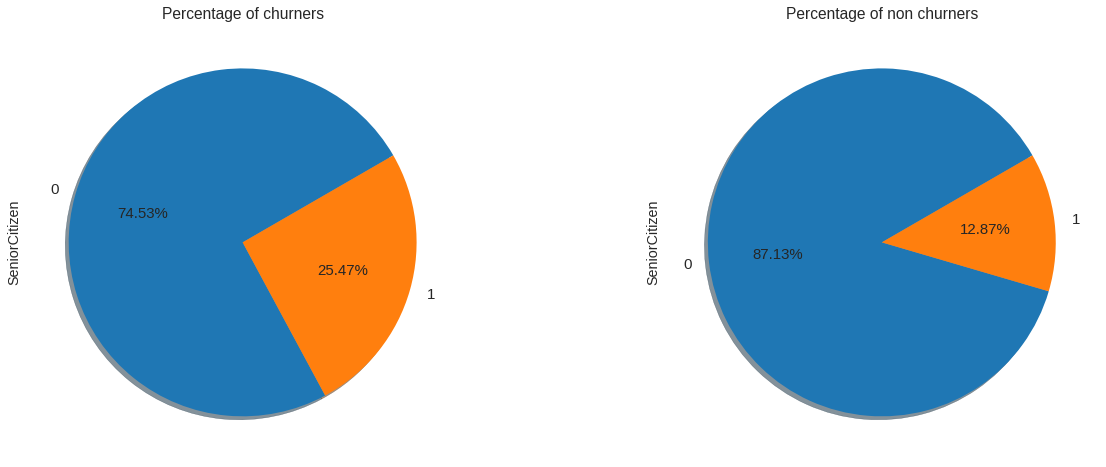

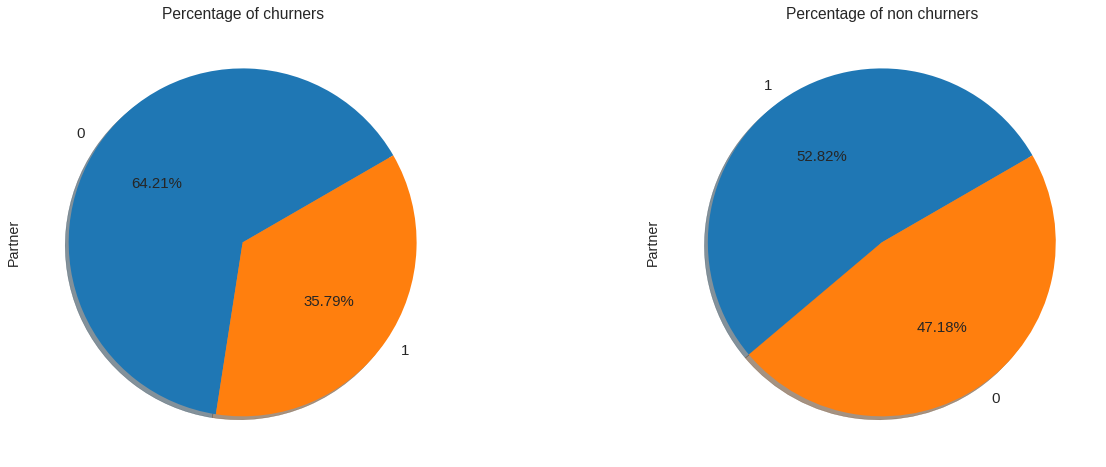

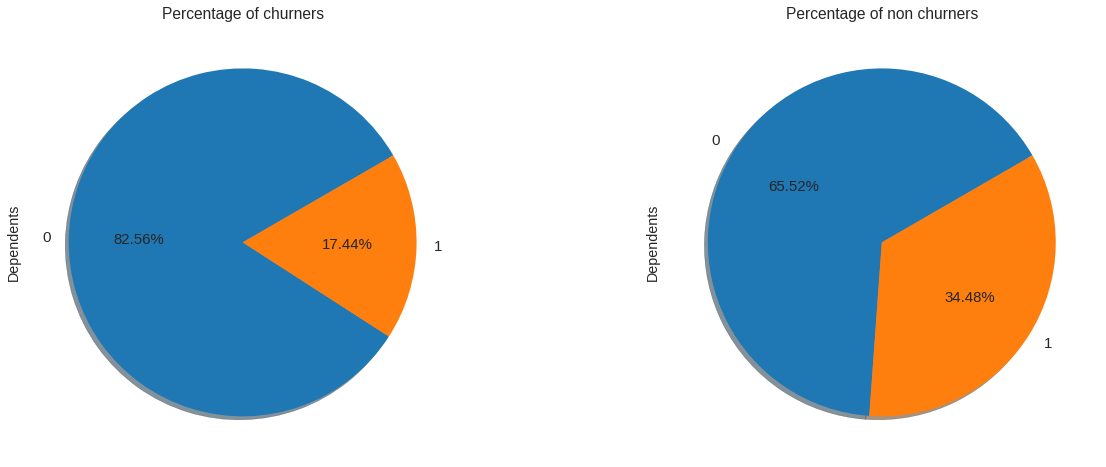

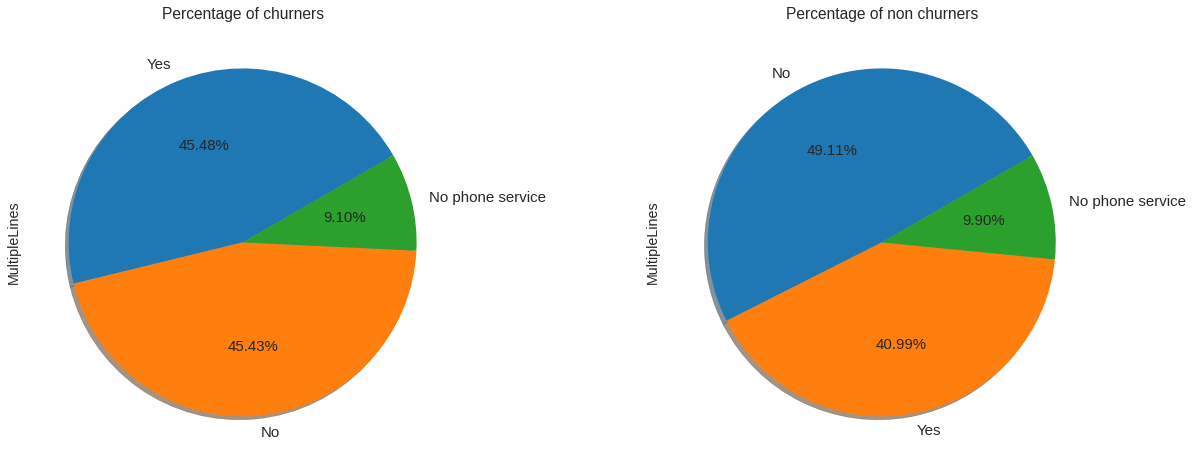

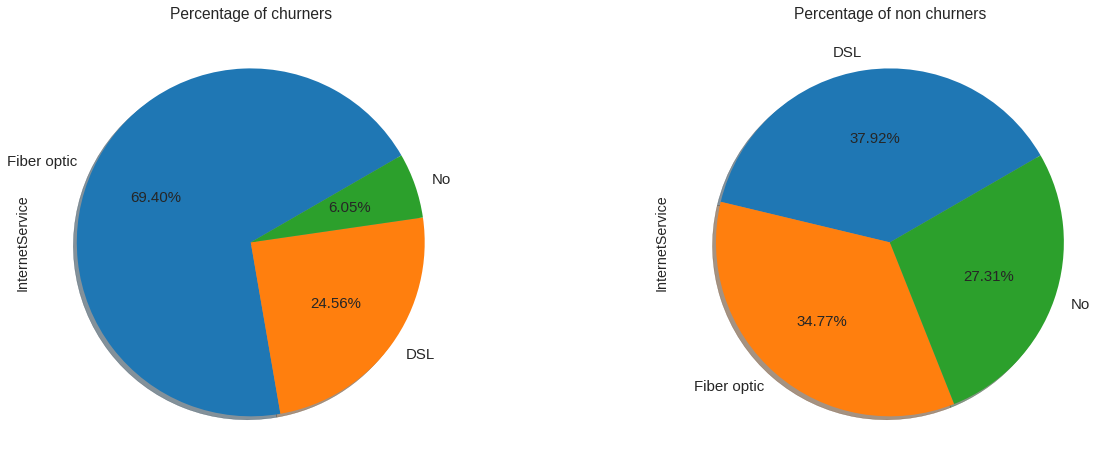

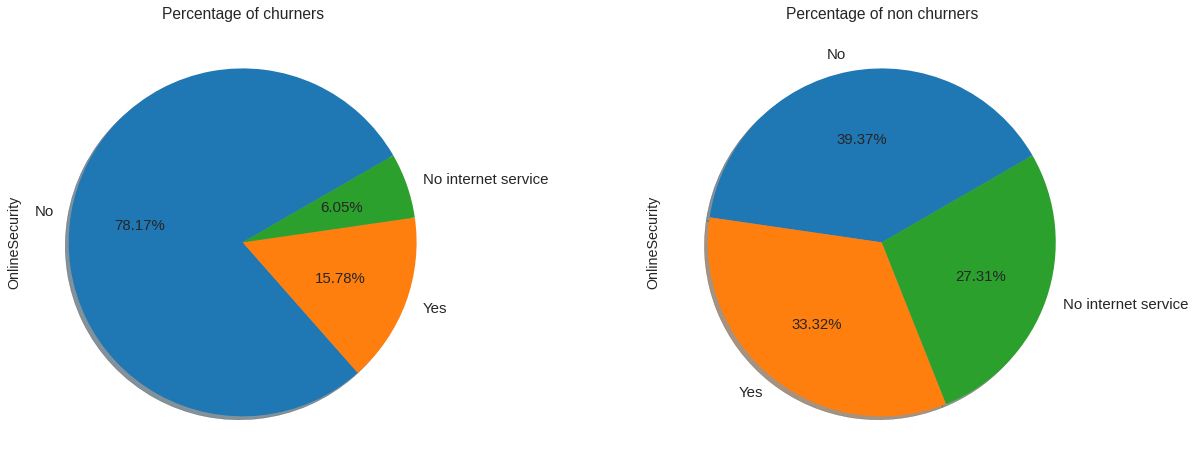

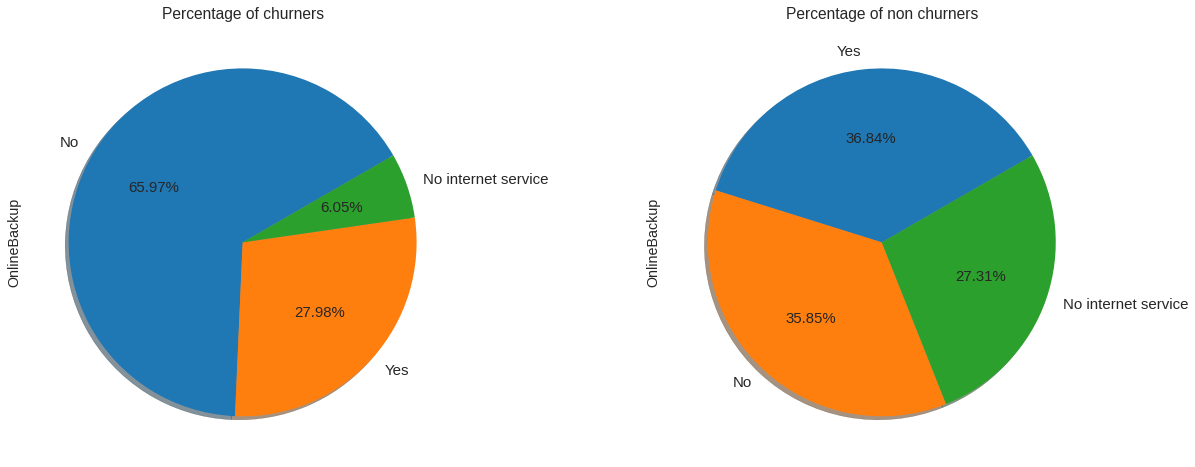

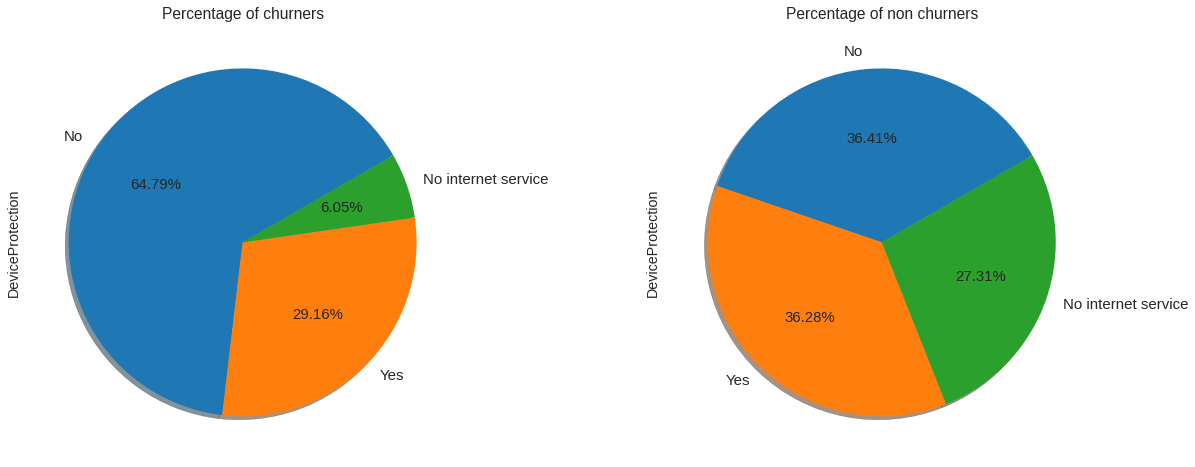

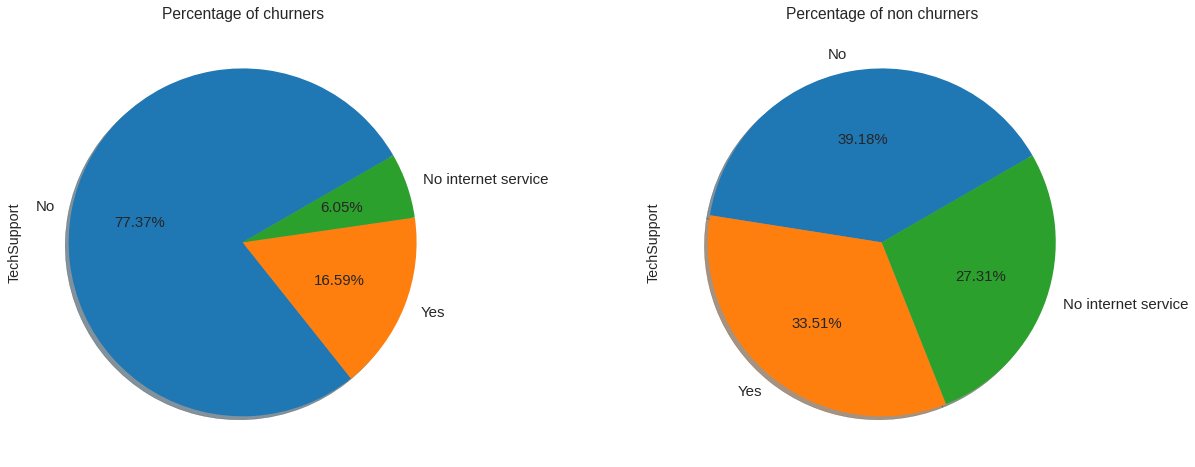

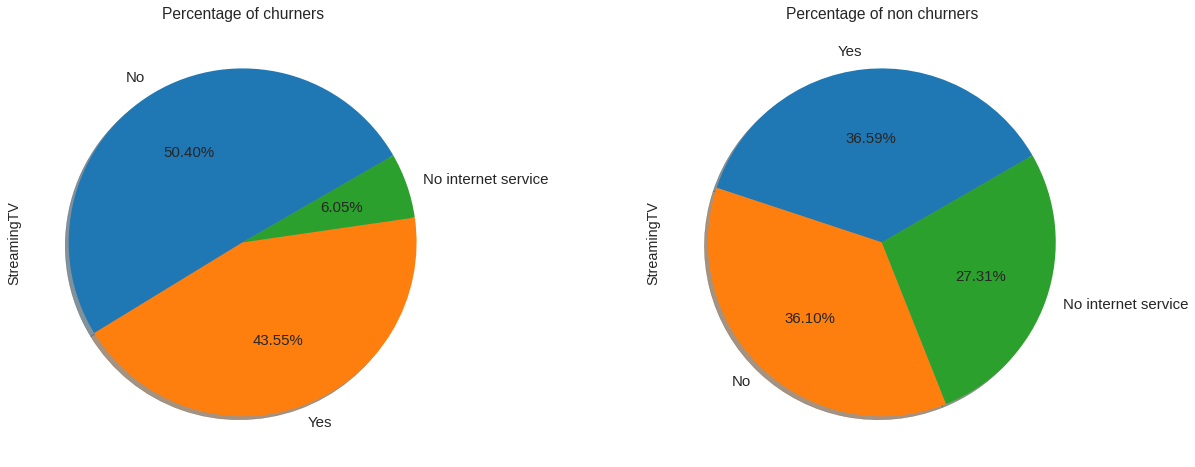

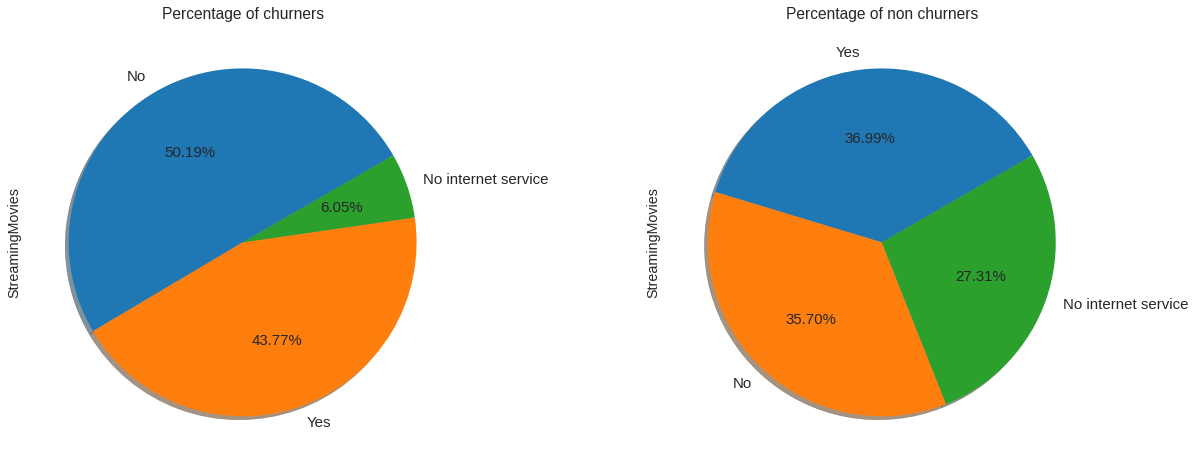

In [49]:
for i in categorical_column:
  plt.style.use(['seaborn-dark','seaborn-talk'])
  fig,ax=plt.subplots(1,2,figsize=(21,8))
  churn[i].value_counts().plot.pie(ax=ax[0],autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
  ax[0].set_title("Percentage of churners")

  not_churn[i].value_counts().plot.pie(ax=ax[1],autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
  ax[1].set_title("Percentage of non churners")
  plt.show()
  

**Dealing with the numerical variables**

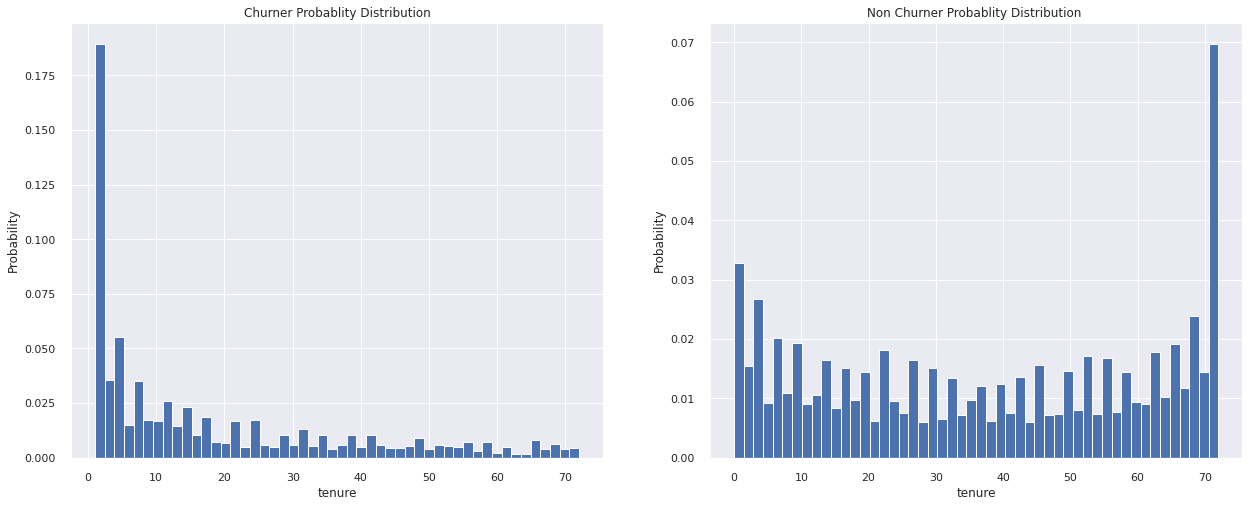

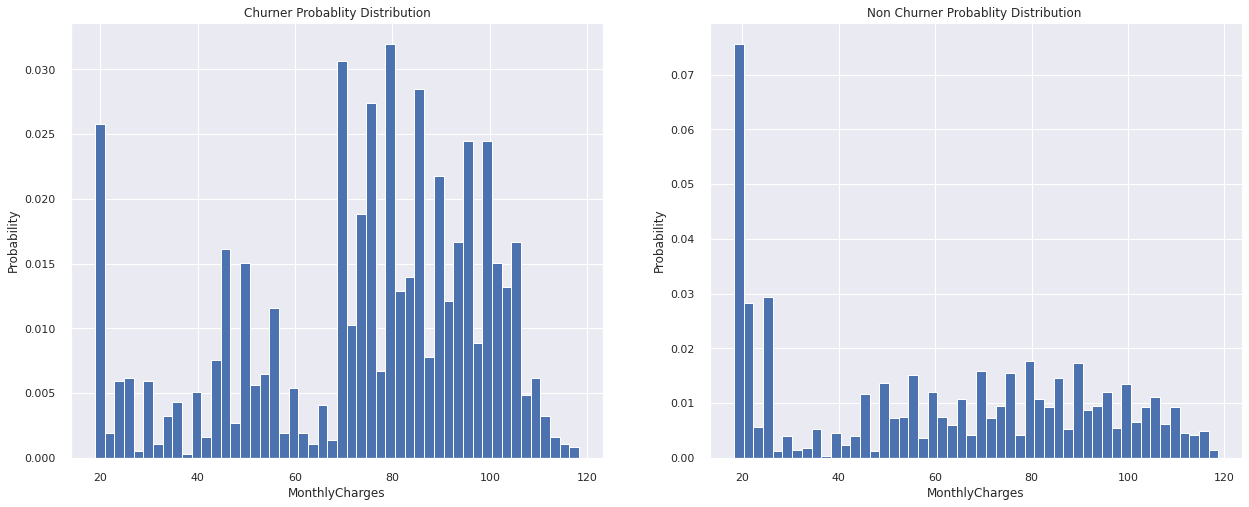

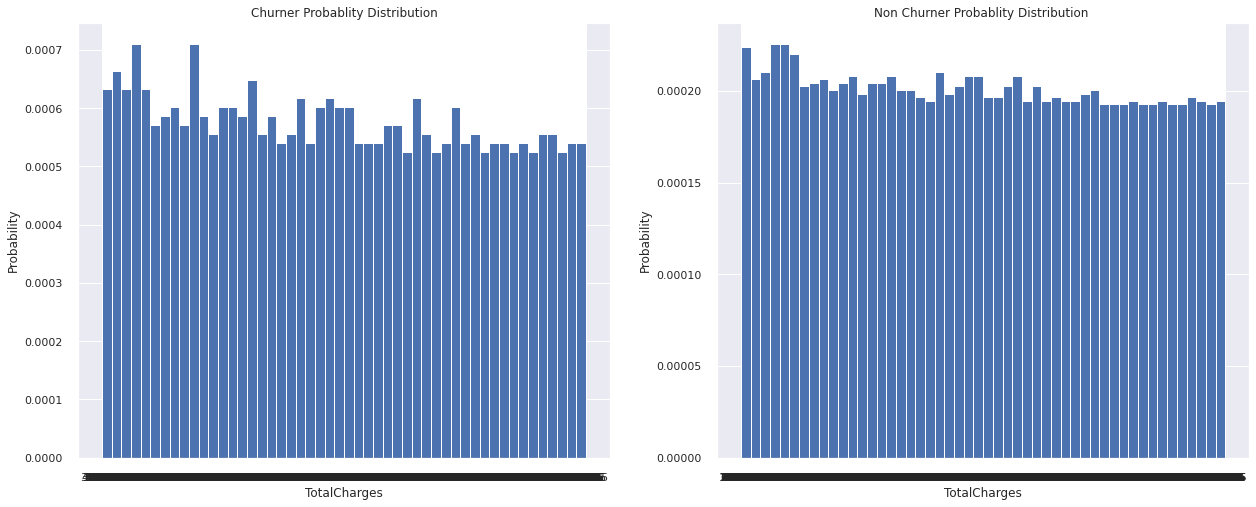

In [296]:
numeric_column=['tenure','MonthlyCharges','TotalCharges']
for i in numeric_column:
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(21,8))
  ax1.hist(churn[i],bins=50,density=True)
  ax1.set_xlabel(i)
  ax1.set_ylabel('Probability')
  ax1.set_title('Churner Probablity Distribution')


  ax2.hist(not_churn[i],bins=50,density=True)
  ax2.set_xlabel(i)
  ax2.set_ylabel('Probability')
  ax2.set_title('Non Churner Probablity Distribution ')

**Preliminary Findings**



1.   Overall churn rate is 26.54 %.
2.   There is high percentage of customers of month-to-month-contract in churners (88.55 %) as compared in non-churners (42.91 %).
3.   There is high percentage of customers of PaperlessBilling in churners (74.91 %) as compared in non-churners (53.56 %).
4.   There is high percentage of customers of Electronic-cheque-PaymentMethod in churners (57.30 %) as compared in non-churners (25.20 %).
5.   There is high percentage of customers of SeniorCitizen-Yes in churners (25.47 %) as compared in non-churners (12.87 %).
6.   There is high percentage of customers of partners-Yes in churners (64.21 %) as compared in non-churners (52.82 %).
7.   There is high percentage of customers of Dependents-No in churners (82.56 %) as compared in non-churners (65.52 %).
8.   There is high percentage of customers of FiberOptic-InternetService in churners (69.40 %) as compared in non-churners (37.92 %).
9.   There is high percentage of customers of OnlineSecurity-No in churners (78.17 %) as compared in non-churners (39.37 %).
10.   There is high percentage of customers of OnlineBackup-No in churners (65.97 %) as compared in non-churners (36.84 %).
11.   There is high percentage of customers of DeviceProtection-No in churners (64.79 %) as compared in non-churners (36.41 %).
12.   There is high percentage of customers of TechSupport-No in churners (77.37 %) as compared in non-churners (39.18 %).
13.   There is high percentage of customers of StreamingTV-No in churners (50.40 %) as compared in non-churners (36.59 %).
14.   There is high percentage of customers of StreamingMovies-No in churners (50.19 %) as compared in non-churners (36.99 %).
15.   There is high percentage of customers with lower tenure in churners as compared in non-churners.
16.   There is high percentage of customers with higher MonthlyCharges in churners (88.55 %) as compared in non-churners (88.55 %).





**Standard Scaling**

Differnt variables are measured on different scsles and hence have different weights. Therefore we need to standaridze the variables on the same scale so that our model gives accurate prediction.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [59]:
telecom[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(telecom[['tenure','MonthlyCharges','TotalCharges']])

In [60]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,-1.280248,0,1,-1.161694,-0.994194,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0.512486,0,0,-0.747850,-0.195248,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,-1.239504,1,1,0.196178,-0.940457,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


**Future Scaling**

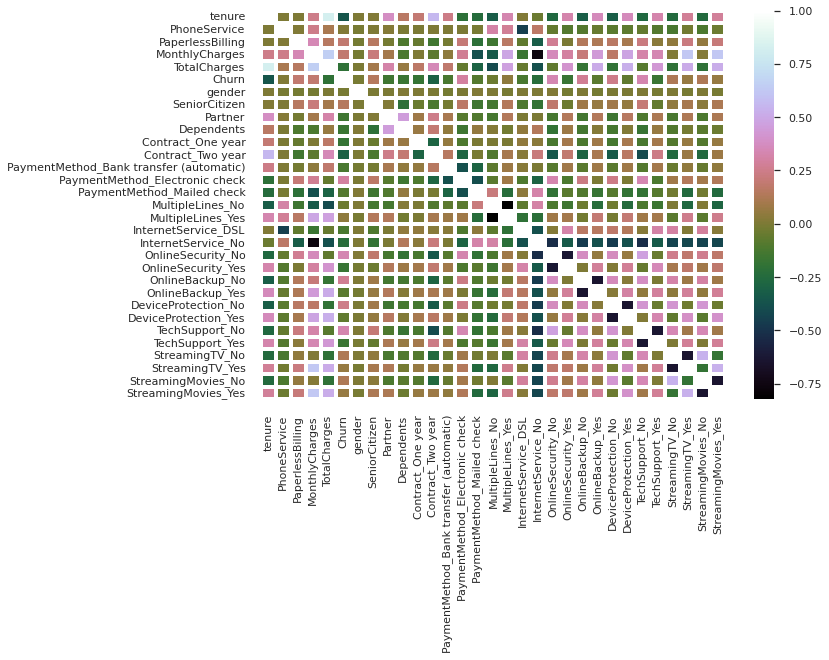

In [62]:
sns.set(font_scale=1)
plot=sns.heatmap(telecom.corr(),cmap="cubehelix",linewidths=3,square=False)

## **Model Buildig**
The data is preprocessed and is ready to be used for model building.

In [263]:
x=telecom.drop(['Churn'],axis=1)
y=telecom['Churn']

**Splitting dataset using train_test_split**

In [264]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

**Applying the Logistic Regression model**

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [266]:
logreg1=LogisticRegression().fit(x_train,y_train)
y_pred1=logreg1.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [267]:
y_pred1

array([0, 0, 0, ..., 0, 0, 1])

In [268]:
accuracy_score(y_test,y_pred1)

0.7874911158493249

**Using Recursive Feature Elimination**

In [269]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [270]:
logreg2=LogisticRegression()
rfe=RFE(logreg2,15)
rfe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [271]:
print(rfe.support_)

[ True  True  True False  True False  True False False  True  True False
  True False  True False  True  True  True False  True False False False
  True False False  True False False]


In [272]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('gender', False, 12),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 2),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 14),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 16),
 ('InternetService_DSL', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 13),
 ('OnlineBackup_No', True, 1),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_No', False, 4),
 ('DeviceProtection_Yes', False, 5),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 15),
 ('StreamingTV_No', False, 10),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 9),
 ('StreamingMovies_Yes', False, 3)]

In [273]:
col=x_train.columns[rfe.support_] ## only relevant variables to be selected
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No',
       'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_Yes'],
      dtype='object')

In [274]:
x.columns[~rfe.support_]

Index(['MonthlyCharges', 'gender', 'Partner', 'Dependents',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

**Running Logistic Regression using selected variables**

In [275]:
logreg3=LogisticRegression().fit(x_train[col],y_train)
y_pred3=logreg3.predict(x_train[col])

In [276]:
y_pred3[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [277]:
accuracy_score(y_pred3,y_train)

0.8092444444444444

The accuracy score is 80.92 %. Though it is good, let's improve our model. We apply the Variance Inflation Factor (VIF) to remove some highly multicorrelated variables and then apply the model.

**VIF**

In [278]:
def vif(predictors,target):
  vif_df=pd.DataFrame(columns=["var","vif"])
  x_vars=predictors
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.OLS(y,x).fit().rsquared
    vif=round(1/(1-rsq),2)
    vif_df.loc[i]=[xvar_names[i],vif]
  return vif_df.sort_values(by="vif",axis=0,ascending=False,inplace=False)

We are going to keep only those columns which are extracted after applying RFE (Recursive Factor Elimination).

In [279]:
vif(telecom[col],telecom["Churn"])

,var,vif
1,PhoneService,10.51
3,TotalCharges,9.21
0,tenure,6.70
2,PaperlessBilling,2.77
4,SeniorCitizen,1.31
10,InternetService_No,0.83
6,Contract_Two year,0.28
5,Contract_One year,0.25
11,OnlineSecurity_No,0.16
13,TechSupport_No,0.13


A rough thumb rule states that the value of VIF>=5 indicated moderate multicollinearity and the value of VIF>=10 indicated severe multicollinearity.
Here from the above results, we see that PhoneService, TotalCharges and tenure have 10.51, 9.21, and 6.70 respectively as their VIF. It indicates PhoneService having the Severe multicollinearity, TotalCharges having nearly severe multicollinearity and the tenure having a little more than moderate multicollinearity.

Let's remove the PhoneService and calculate the VIF again.

In [280]:
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No',
       'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_Yes'],
      dtype='object')

In [281]:
col=['tenure','PaperlessBilling', 'TotalCharges','SeniorCitizen', 'Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check',
     'MultipleLines_No','InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No','OnlineBackup_No', 'TechSupport_No', 'StreamingTV_Yes']

In [282]:
vif(telecom[col],telecom["Churn"])

,var,vif
2,TotalCharges,7.19
0,tenure,5.98
1,PaperlessBilling,2.65
3,SeniorCitizen,1.31
9,InternetService_No,0.54
5,Contract_Two year,0.27
4,Contract_One year,0.25
10,OnlineSecurity_No,0.15
13,StreamingTV_Yes,0.13
12,TechSupport_No,0.12


Let's remove TotalCharges also as it is near to severe multicollinearity

In [283]:
col=['tenure','PaperlessBilling','SeniorCitizen', 'Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check',
     'MultipleLines_No','InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No','OnlineBackup_No', 'TechSupport_No', 'StreamingTV_Yes']

In [284]:
vif(telecom[col],telecom["Churn"])

Now, all the variable seems fine and multi collinearity is very less. We can these variables in our final model.

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [286]:
logreg4=LogisticRegression()
logreg4.fit(x_train[col],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Prediction**

In [287]:
churn_predicted=logreg4.predict(x_train[col])
Churn_Probability=logreg4.predict_proba(x_train[col])

In [288]:
Churn_Probability=pd.DataFrame(Churn_Probability)
Churn_Probability.head()

,0,1
0,0.691145,0.308855
1,0.857751,0.142249
2,0.715799,0.284201
3,0.987175,0.012825
4,0.961298,0.038702


In [289]:
final_result=pd.DataFrame({"CustID":y_train.index,'Churn_Actual':y_train.values,'Churn_Probability':Churn_Probability[1],"Churn_Predicted":churn_predicted})

In [290]:
final_result.head(20)

,CustID,Churn_Actual,Churn_Probability,Churn_Predicted
0,1010,0,0.308855,0
1,2732,0,0.142249,0
2,2940,1,0.284201,0
3,859,0,0.012825,0
4,2895,0,0.038702,0
5,4573,0,0.005969,0
6,5897,0,0.005942,0
7,1188,0,0.279488,0
8,6571,0,0.047197,0
9,6515,1,0.264551,0


## **Model Evaluation**

In [291]:
confusion_matrix=confusion_matrix(final_result.Churn_Actual,final_result.Churn_Predicted)
pd.DataFrame(confusion_matrix,("No Churn","Churn"),("No Churn","Churn"))

,No Churn,Churn
No Churn,3747,403
Churn,687,788


Text(0.5, 35.25000000000001, 'Churn Predicted')

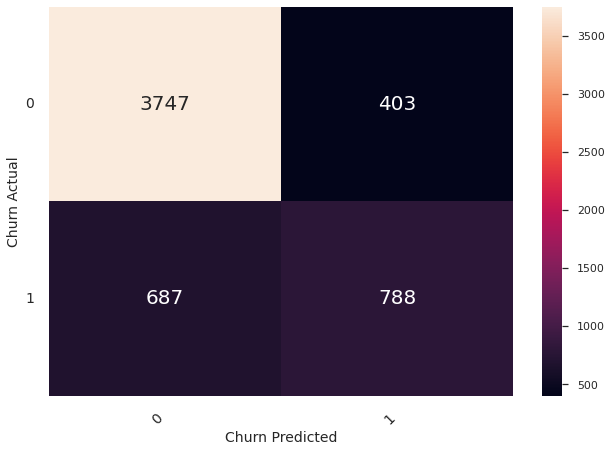

In [292]:
heatmap=sns.heatmap(confusion_matrix,annot=True,annot_kws={'size':20},fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha="right",fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha="right",fontsize=14)
plt.ylabel('Churn Actual',fontsize=14)
plt.xlabel('Churn Predicted',fontsize=14)

In [293]:
print("Intercept : "+ str(logreg3.intercept_))
print("\nRegression coefficient :\n " + str(logreg3.coef_))
print("\nAccuracy : " +str(accuracy_score(final_result.Churn_Actual,final_result.Churn_Predicted)))
print("\nClassification Report\n",classification_report(final_result.Churn_Actual,final_result.Churn_Predicted))

Intercept : [-1.53324088]

Regression coefficient :
 [[-1.45682662 -0.33204985  0.37106745  0.67387661  0.37417123 -0.61627573
  -1.24866608  0.32562452 -0.19482458 -0.77008041 -0.64048008  0.45650865
   0.18315099  0.43277417  0.26590317]]

Accuracy : 0.8062222222222222

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4150
           1       0.66      0.53      0.59      1475

    accuracy                           0.81      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.81      0.80      5625



The model accuracy is 80.62 %

**Calculating Sensitivity and Specificity**

In [294]:
TP=confusion_matrix[0,0]
TN=confusion_matrix[1,1]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

In [295]:
print("Snesitivity : ", TP/float(TP+FN))
print("Specificity : ", TN/float(TN+FP))

Snesitivity :  0.8450608930987822
Specificity :  0.6616288832913518


## **Conclusion**
Through this project we have taken a telecom dataset and tried to predict if the customer would churn. We used Logistic Regression model and also used many other algorithms like Recursion Feature Elimination, standard scalar, Sensitivity and specificity and many more.
Overall the model was 80 % accurate.